<a href="https://colab.research.google.com/github/ignadr/ML-Algorithms-Manual/blob/main/experience_vs_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub
import math

In [ ]:
# Download latest version
path = kagglehub.dataset_download("rsadiq/salary")
print(path)

/kaggle/input/salary


In [ ]:
# Read the csv
df = pd.read_csv('/kaggle/input/salary/Salary.csv')

# Put YearsExperience as x and Salary as y
x = df.iloc[:, 0].values
y = df.iloc[:, -1].values

print(f"Years of experience: {x}")
print(f"Salary: {y}")

# The x is 1D array instead of 2D array
# For 2D array, use:
# x = df.iloc[:, :-1].values

Years of experience: [ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5 11.2 11.5 12.3 12.9 13.5]
Salary: [ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872
 127345 126756 128765 135675 139465]


## Compute a basic linear regression model

In [ ]:
# Insert initial weight and bias
w_init = 300
b_init = 300

In [ ]:
def compute_model_output(x, w, b):
  # Get the amount of data m
  m = x.shape[0]

  # Set an empty array to fill with the prediction
  f_wb = np.zeros(m)

  # Loop to calculate the prediction for each data point
  for i in range(m):
    f_wb[i] = w * x[i] + b

  return f_wb

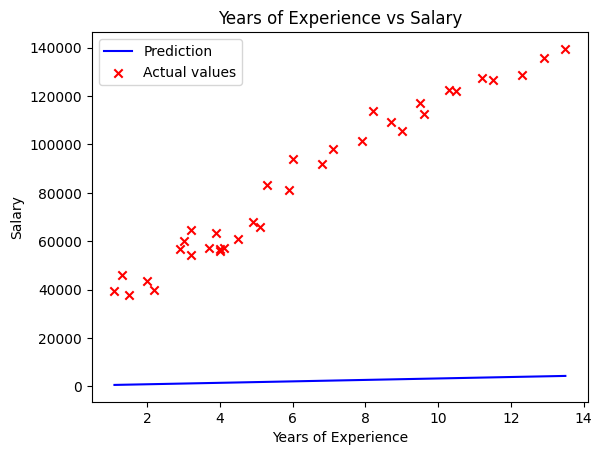

In [ ]:
# Get the predictions
init_f_wb = compute_model_output(x, w_init, b_init)

# Plot the prediction
plt.plot(x, init_f_wb, c='b', label='Prediction')

# Plot data points
plt.scatter(x, y, marker='x', c='r', label='Actual values')

# Set the title
plt.title("Years of Experience vs Salary")

# Set the x-axis label
plt.xlabel("Years of Experience")

# Set the y-axis label
plt.ylabel("Salary")

plt.legend()
plt.show()

## Applying Gradient Descent

In [ ]:
# Function to compute the cost with the current w and b
def compute_cost(x, y, w, b):
  # Get the amount of data m
  m = x.shape[0]

  # Variable to store the sum of squared error
  cost_sum = 0

  # Calculate the sum of squared error
  for i in range(m):
    f_wb = w * x[i] + b
    cost = (f_wb - y[i]) ** 2
    cost_sum = cost_sum + cost

  # Calculate the average sum of squared error
  total_cost = cost_sum / (2 * m)

  return total_cost

In [ ]:
# Check the cost with the current w and b
total_cost = compute_cost(x, y, w_init, b_init)
print(f"Total cost: {total_cost}")

Total cost: 3811470695.114286


In [ ]:
# Function to compute the slope/gradient
def compute_gradient(x, y, w, b):
  # Get the amount of data m
  m = x.shape[0]

  # Variable to store the slope of J along the direction of w
  dj_dw = 0

  # Variable to store the slope of J along the direction of b
  dj_db = 0

  # Calculate the slope
  for i in range(m):
    f_wb = w * x[i] + b
    dj_dw = dj_dw + ((f_wb - y[i]) * x[i])
    dj_db = dj_db + (f_wb - y[i])

  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db

In [ ]:
# Check the gradient
dj_dw, dj_db = compute_gradient(x, y, w_init, b_init)
print(f"dj_dw: {dj_dw}")
print(f"dj_db: {dj_db}")

dj_dw: -623000.9
dj_db: -81753.02857142857


In [ ]:
def gradient_descent(x, y, w_init, b_init, alpha, num_iter, cost_function, gradient_function):
  # Variable to see the changes in the value of the cost throughout the iterations
  J_hist = []

  # Variables to store w and b
  w = w_init
  b = b_init

  for i in range(num_iter):
    # Get the gradients
    dj_dw, dj_db = compute_gradient(x, y, w, b)

    # Calculate the new w and b
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    # Get the cost for current w and b
    J_hist.append(compute_cost(x, y, w, b))

    # Print the values every 1000 iterations
    if i % math.ceil(num_iter / 10) == 0:
      print(f"Iteration: {i}\t\tCost: {J_hist[i]:.3f}\t\tw: {w:.3f}\t\tb: {b:.3f}")

  return w, b, J_hist

In [ ]:
w_final, b_final, J_hist = gradient_descent(x, y, w_init, b_init, 0.001, 100000, compute_cost, compute_gradient)

Iteration: 0		Cost: 3427173631.604		w: 923.001		b: 381.753
Iteration: 10000		Cost: 18255789.958		w: 9032.711		b: 26367.027
Iteration: 20000		Cost: 17509730.005		w: 8759.563		b: 28630.621
Iteration: 30000		Cost: 17503437.619		w: 8734.478		b: 28838.504
Iteration: 40000		Cost: 17503384.548		w: 8732.174		b: 28857.596
Iteration: 50000		Cost: 17503384.101		w: 8731.962		b: 28859.349
Iteration: 60000		Cost: 17503384.097		w: 8731.943		b: 28859.510
Iteration: 70000		Cost: 17503384.097		w: 8731.941		b: 28859.525
Iteration: 80000		Cost: 17503384.097		w: 8731.941		b: 28859.526
Iteration: 90000		Cost: 17503384.097		w: 8731.941		b: 28859.526


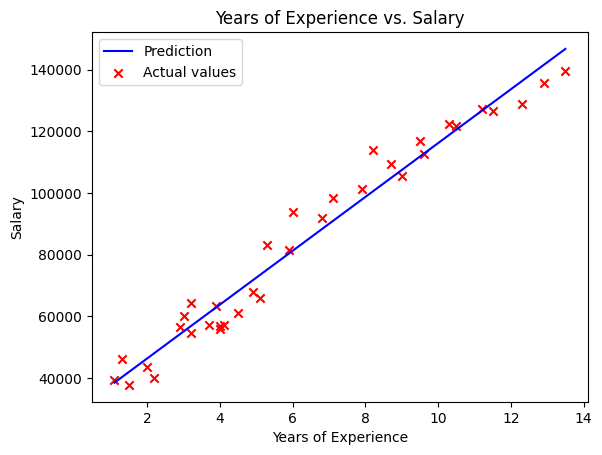

In [ ]:
# Get the prediction with the new w and b
final_f_wb = compute_model_output(x, w_final, b_final)

# Plot the prediction and actual values
plt.plot(x, final_f_wb, c='b', label="Prediction")
plt.scatter(x, y, marker='x', c='r', label="Actual values")

plt.title("Years of Experience vs. Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()

plt.show()